In [3]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt


vou fazer a analise de uma imagem pra ver como é o histograma, ELA e outras caracteristicas estatisticas


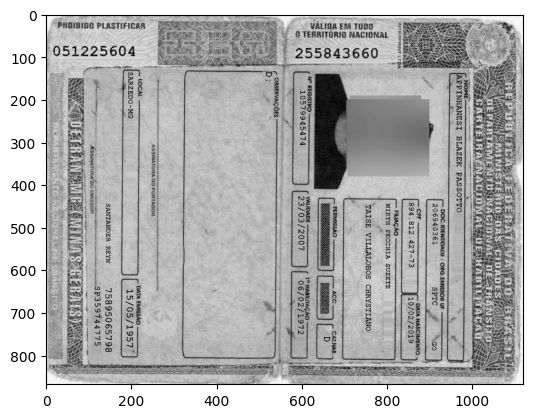

In [15]:
# importando UMA IMAGEM DO CONJUNTO DE DADOS
IMAGE_PATH = 'CNH_Aberta/00000000_in.jpg'
image = cv2.imread(IMAGE_PATH)
image_pb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0

plt.imshow(image_pb, cmap='gray')
plt.show()

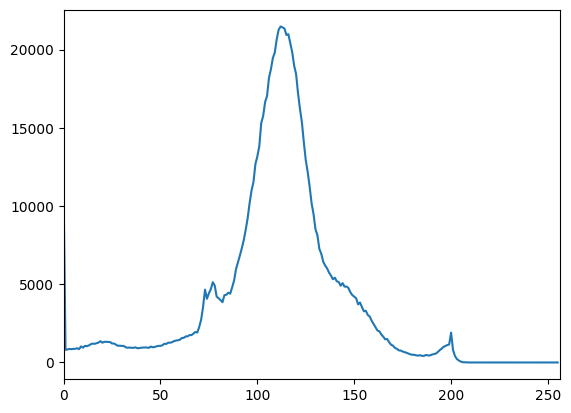

In [16]:
#plotando o histograma da imagem
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### ELA
Vou salvar a imagem com uma compressão de 90% e comparar (diff) com a original, as partes como a diferença grande, provavelmente são as que foram comprimidas em separado do resto da imagem

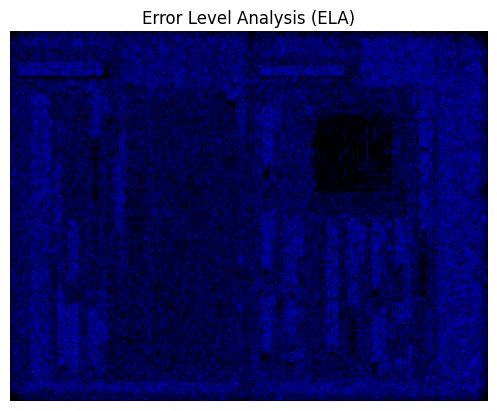

In [ ]:
# salvando a imagem com compressão de 90%
cv2.imwrite('compressed.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
# lendo a imagem comprimida
compressed_image = cv2.imread('compressed.jpg')
# convertendo para float32 para evitar overflow
image_float = image.astype(np.float32)
compressed_float = compressed_image.astype(np.float32)
# calculando a diferença absoluta entre a imagem original e a comprimida
diff = cv2.absdiff(image_float, compressed_float)
# amplificando a diferença para visualização
diff_amplified = cv2.multiply(diff, np.array([50.0]))#aqui mult bem alto pra ficar mais visivel
# convertendo de volta para uint8
diff_uint8 = cv2.convertScaleAbs(diff_amplified)
# exibindo a imagem de diferença
plt.imshow(cv2.cvtColor(diff_uint8, cv2.COLOR_BGR2RGB))
plt.title('Error Level Analysis (ELA)')
plt.axis('off')
plt.show()